# Анализ Upsell-а в кредитовании

**Введение:**

Данное задание посвящено анализу перекрестных продаж (Upsell) в сфере кредитования Тинькофф Банка.

**Цель:**

Определить ключевые факторы, влияющие на выбор клиентом вида кредитования, чтобы
оптимизировать процесс Upsell-а.

In [2]:
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns


def read(n: str, **kwargs):
    return pl.read_csv(f"../data/{n}", **kwargs).to_pandas()


data = read("data.csv")

**Переменные:**

| Название переменной | Описание | Единицы измерения |
|---|---|---|
| customer_id | ID клиента | - |
| application_id | ID заявки на кредитование | - |
| application_dttm | Дата подачи заявки | - |
| req_amt | Запрошенная сумма кредитования | Условные денежные единицы |
| req_term | Запрошенный срок кредитования | Месяцы |
| req_product_code | Код запрошенного продукта: CL, CLC, CLR | - |
| monthly_income_amt | Доход клиента в месяц | Условные денежные единицы |
| age | Возраст клиента | Года |
| gender_code | Пол: M - мужчина, F - женщина | - |
| car_flg | Наличие авто: 0 - нет, 1 - есть | - |
| car_price | Цена авто (если известна) | Условные денежные единицы |
| realty_flg | Наличие недвижимости: 0 - нет, 1 - есть | - |
| realty_price | Цена недвижимости (если известна) | Условные денежные единицы |
| cc_flg | Наличие кредитной карты: 0 - нет, 1 - есть | - |
| cl_approve_amt | Одобренная сумма КН | Условные денежные единицы |
| cl_rate | Одобренная ставка КН | - |
| clc_approve_amt | Одобренная сумма КНА | Условные денежные единицы |
| clc_rate | Одобренная ставка КНА | - |
| clr_approve_amt | Одобренная сумма КНН | Условные денежные единицы |
| clr_rate | Одобренная ставка КНН | - |
| cc_approve_amt | Одобренный лимит КК | Условные денежные единицы |
| agreement_id | ID согласования условий | - |
| agreement_dttm | Дата и время согласования условий | - |
| product_sale_priority | Приоритет продажи продуктов на СУ | - |
| agreement_product_code | Код согласованного продукта: CC, CL, CLC, CLR, To CLC, To CLR, Unsuccess | - |
| account_amt | Согласованная сумма открытого счета | Условные денежные единицы |
| account_term | Согласованный срок открытого счета | Месяцы |
| account_rate | Согласованная ставка открытого счета | - |
| success_activate_flg | Флаг успешной активации кредита: 0 - нет, 1 - есть | - |

**Комментарии к заданию:**

1. Выделить целевую аудиторию (ЦА) для каждого вида кредитования.
2. Определить характеристики клиента, которые могут быть связаны с выбором вида кредитования.
3. Сгруппировать данные на уровне клиентов.
4. Провести анализ Upsell-а: как банк стремится получить максимальную выгоду.
5. Провести анализ данных, чтобы выявить ключевые факторы, влияющие на выбор клиента.
6. Подвести итоги исследования, указав полученные результаты, ограничения, возможности для улучшения.

**Примечание:**

В рамках исследования можно сосредоточиться на отдельных аспектах, исследуя их
глубоко.

In [5]:
data["application_dttm"] = pd.to_datetime(
    data["application_dttm"], format="%m-%d-%y"
)
data["agreement_dttm"] = pd.to_datetime(
    data["agreement_dttm"], format="%m/%d/%y %H:%M"
)

numeric_cols = [
    "req_amt",
    "req_term",
    "monthly_income_amt",
    "car_price",
    "realty_price",
    "cl_approve_amt",
    "cl_rate",
    "clc_approve_amt",
    "clc_rate",
    "clr_approve_amt",
    "clr_rate",
    "cc_approve_amt",
]
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

data["gender_code"].fillna(data["gender_code"].mode()[0], inplace=True)
data.dropna(subset=["age"], inplace=True)

C:\Users\xpos587\AppData\Local\Temp\ipykernel_17420\2208630864.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\xpos587\AppData\Local\Temp\ipykernel_17420\2208630864.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


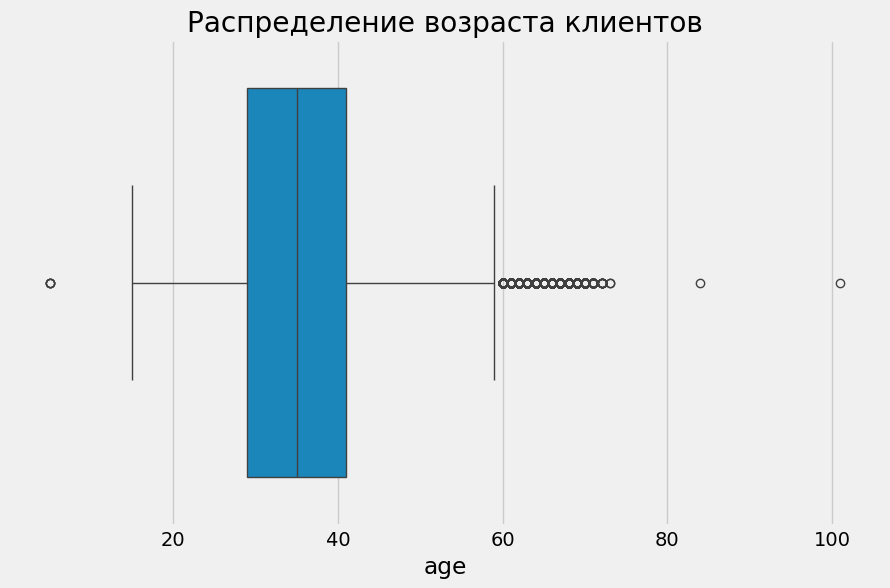

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data["age"])
plt.title("Распределение возраста клиентов")
plt.show()